<a href="https://colab.research.google.com/github/FerdousJUST/InceptionV3-model-implementation-for-Fish-Image-Classification-/blob/main/Classification_with_Random_Forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import os
import seaborn as sns

In [2]:
print(os.listdir("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/"))

['Validation', '.ipynb_checkpoints', 'Training', 'valid_test_data', 'Validation_Fish', 'Training1 ', 'Training New', 'Validation New']


In [3]:
SIZE = 128

In [4]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    #for img_path in glob.glob(os.path.join(directory_path)):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
       # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Spotted_Snakehead_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Hilsha_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Tilapia_Fish


In [5]:
train_images.shape

(4800, 128, 128, 3)

In [6]:
train_labels.shape

(4800,)

In [7]:

# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Tilapia_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Spotted_Snakehead_Fish


In [8]:
test_images.shape

(1200, 128, 128, 3)

In [9]:
test_labels.shape

(1200,)

In [10]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [11]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
x_train.shape

(4800, 128, 128, 3)

In [14]:
x_test.shape

(1200, 128, 128, 3)

In [15]:
y_train.shape

(4800,)

In [16]:
y_test.shape

(1200,)

In [17]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
#y_train_one_hot = to_categorical(y_train,num_classes = 4,dtype="uint8")
#y_test_one_hot = to_categorical(y_test,num_classes = 4,dtype="uint8")
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
y_train_one_hot.shape

(4800, 4)

In [19]:
y_test_one_hot.shape

(1200, 4)

In [20]:
#activation = 'sigmoid'
activation = 'softmax'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
#feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [21]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [22]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                             

In [23]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=20, validation_data = (x_test, y_test_one_hot))

Epoch 1/20
150/150 [==============================] - 417s 3s/step - loss: 1.3064 - accuracy: 0.4769 - val_loss: 1.4152 - val_accuracy: 0.2500
Epoch 2/20
150/150 [==============================] - 414s 3s/step - loss: 1.1543 - accuracy: 0.6942 - val_loss: 1.4480 - val_accuracy: 0.2500
Epoch 3/20
150/150 [==============================] - 414s 3s/step - loss: 1.0721 - accuracy: 0.7027 - val_loss: 1.1607 - val_accuracy: 0.5783
Epoch 4/20
150/150 [==============================] - 412s 3s/step - loss: 0.9999 - accuracy: 0.7140 - val_loss: 1.0709 - val_accuracy: 0.6408
Epoch 5/20
150/150 [==============================] - 416s 3s/step - loss: 0.9443 - accuracy: 0.7169 - val_loss: 1.0787 - val_accuracy: 0.6200
Epoch 6/20
150/150 [==============================] - 414s 3s/step - loss: 0.8954 - accuracy: 0.7254 - val_loss: 1.0023 - val_accuracy: 0.6617
Epoch 7/20
150/150 [==============================] - 414s 3s/step - loss: 0.8634 - accuracy: 0.7244 - val_loss: 0.9721 - val_accuracy: 0.6725

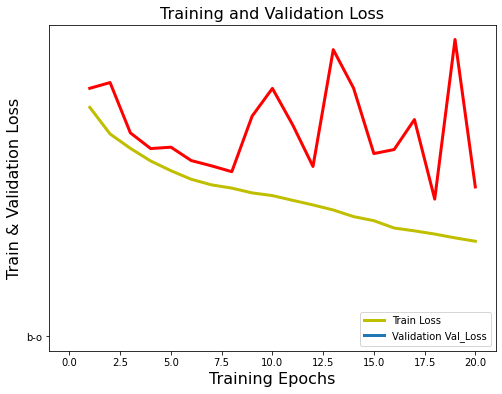

In [27]:
#plot the training and validation accuracy and loss at each epoch
plt.figure(figsize = (8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y','b-o', label='Training loss',linewidth=3.0)
plt.plot(epochs, val_loss, 'r','b-o', label='Validation loss',linewidth=3.0)
plt.title('Training and Validation Loss',fontsize= 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Validation Loss",fontsize =16)
plt.legend(['Train Loss', 'Validation Val_Loss'], loc='lower right')
plt.show()

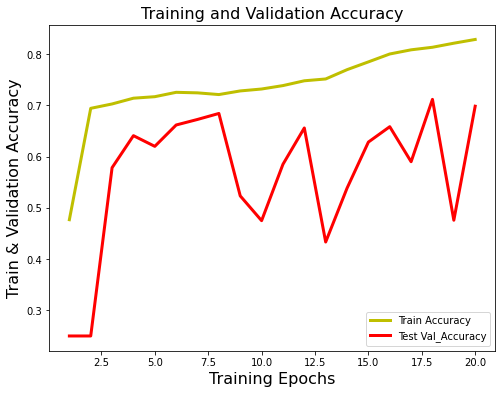

In [31]:
plt.figure(figsize = (8,6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training acc',linewidth=3.0 )
plt.plot(epochs, val_acc, 'r', label='Validation acc',linewidth=3.0 )
plt.title('Training and Validation Accuracy',fontsize= 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Validation Accuracy",fontsize =16)
plt.legend(['Train Accuracy', 'Test Val_Accuracy'], loc='lower right')
plt.show()

In [32]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

38/38 [==============================] - 29s 743ms/step


[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [163  72  65   0   0   0   0   0]
 [  8 291   1   0   0   0   0   0]
 [ 57   7 236   0   0   0   0   0]
 [ 34  64  54 148   0   0   0   0]]


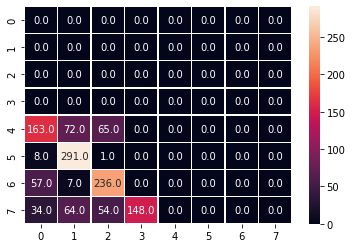

In [50]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True,
            fmt=".1f",                               
            linewidths=0.5, 
            linecolor='white')
         

1/1 [==============================] - 0s 45ms/step
The prediction for this image is:  ['/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Hilsha_Fish']
The actual label for this image is:  /content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish


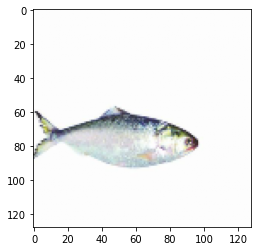

In [53]:
#Check results on a few select images

#n=5 dog park. NN not as good as RF.
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [88]:
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF

150/150 [==============================] - 110s 730ms/step


In [89]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 500, random_state = 80)

In [90]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=500, random_state=80)

In [91]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)

38/38 [==============================] - 28s 726ms/step


In [92]:
X_test_feature.shape

(1200, 65536)

In [93]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)

In [94]:
prediction_RF.shape

(1200,)

In [95]:
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [96]:
test_labels.shape

(1200,)

In [97]:
prediction_RF.shape

(1200,)

In [98]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.0


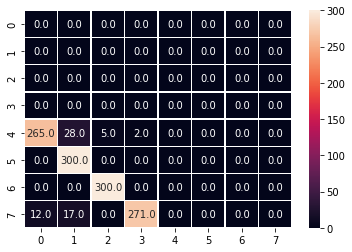

In [99]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True,
            fmt=".1f",                               
            linewidths=0.5, 
            linecolor='white'
            )

1/1 [==============================] - 0s 43ms/step
The prediction for this image is:  ['/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Hilsha_Fish']
The actual label for this image is:  /content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish


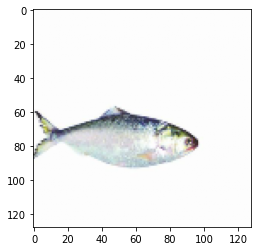

In [100]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=9 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])